In [1]:
import pandas as pd
import chardet
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")


with open('Dataset1.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
#print(result['encoding'])

Dataset1 = pd.read_csv('Dataset1.csv', delimiter=",",decimal = ".",encoding=result['encoding'])
Dataset1.head()

,Vegetation_Type_2,Groundwater_Level_1,Drainage_Quality_1,Slope,Hillshade_9am,Hillshade_Noon,Pollution_Level_1,Water_Source_Distance_2,Terrain_Roughness_2,Urban_Proximity_Index_1,...,Soil_Moisture_Level_2,Horizontal_Distance_To_Hydrology,Wind_Speed_Average_2,Elevation_Range_1,Pollution_Level_2,Vegetation_Type_1,Temperature_Average_1,Canopy_Cover_2,Elevation,Cover_Type
0,450.684968,2054.426315,229.994980,3,221,232,181.000000,227.161401,216.000000,14.0,...,418.375833,258,116.000000,219.000000,224.000000,0.000000,9.000000,503.586301,2596,5
1,889.885392,997.573983,208.000000,2,220,235,166.000000,933.851870,251.000000,16.0,...,2488.726342,212,179.025367,236.000000,224.000000,69.000000,17.000000,537.000000,2590,5
2,1232.738700,676.352745,214.313227,9,234,238,205.000000,4235.282432,176.898683,13.0,...,1852.423116,268,156.000000,200.872578,230.415218,120.357544,10.000000,376.000000,2804,2
3,3359.512595,4720.481538,230.000000,18,238,238,176.002696,1066.935784,220.000000,11.0,...,5388.528248,242,156.000000,230.000000,243.000000,15.000000,12.933234,30.000000,2785,2
4,1907.275049,2187.627994,221.000000,2,220,234,109.000000,1182.489702,184.859965,9.0,...,304.080537,153,112.000000,232.000000,213.000000,39.000000,14.000000,330.000000,2595,5


In [2]:
from sklearn.model_selection import train_test_split # split  data into training and testing sets

X = Dataset1.drop(['Cover_Type'], axis=1).copy()
Y = Dataset1['Cover_Type'].copy()

In [3]:
Y.value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

## We can notice that the data is labelised so the model that can be applied in the data is classification

In [4]:
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_classif
import pandas as pd






mutual_info = mutual_info_classif(X, Y)


mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information'])

# Filtrer les caractéristiques avec une information mutuelle supérieure à 0.01
relevant_features = mutual_info_df[mutual_info_df['Mutual Information'] > 0.01].index

# Afficher les caractéristiques pertinentes
print("Caractéristiques pertinentes (Information Mutuelle > 0.01) :")
print(relevant_features)


Caractéristiques pertinentes (Information Mutuelle > 0.01) :
Index(['Slope', 'Hillshade_9am', 'Hillshade_Noon',
       'Horizontal_Distance_To_Roadways', 'Hillshade_3pm',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points',
       'Aspect', 'Horizontal_Distance_To_Hydrology', 'Elevation'],
      dtype='object')


In [5]:
X = X[relevant_features]
X.head()

,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Roadways,Hillshade_3pm,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Aspect,Horizontal_Distance_To_Hydrology,Elevation
0,3,221,232,510,148,0,6279,51,258,2596
1,2,220,235,390,151,-6,6225,56,212,2590
2,9,234,238,3180,135,65,6121,139,268,2804
3,18,238,238,3090,122,118,6211,155,242,2785
4,2,220,234,391,150,-1,6172,45,153,2595


In [6]:
X.describe()

,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Roadways,Hillshade_3pm,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Aspect,Horizontal_Distance_To_Hydrology,Elevation
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,14.103704,212.146049,223.318716,2350.146611,142.528263,46.418855,1980.291226,155.656807,269.428217,2959.365301
std,7.488242,26.769889,19.768697,1559.254870,38.274529,58.295232,1324.195210,111.913721,212.549356,279.984734
min,0.000000,0.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,1859.000000
25%,9.000000,198.000000,213.000000,1106.000000,119.000000,7.000000,1024.000000,58.000000,108.000000,2809.000000
50%,13.000000,218.000000,226.000000,1997.000000,143.000000,30.000000,1710.000000,127.000000,218.000000,2996.000000
75%,18.000000,231.000000,237.000000,3328.000000,168.000000,69.000000,2550.000000,260.000000,384.000000,3163.000000
max,66.000000,254.000000,254.000000,7117.000000,254.000000,601.000000,7173.000000,360.000000,1397.000000,3858.000000


In [7]:
sample_size = 1000 # Adjust this based on your dataset size
X_sampled = X.sample(n=sample_size, random_state=42)
Y_sampled = Y.loc[X_sampled.index]

In [8]:
X_sampled.describe()

,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Roadways,Hillshade_3pm,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Aspect,Horizontal_Distance_To_Hydrology,Elevation
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.239000,211.96100,222.901000,2337.541000,142.274000,45.694000,1955.295000,155.262000,265.347000,2943.082000
std,7.613004,28.15678,19.640951,1562.373354,39.159244,58.644604,1325.619385,112.038618,215.242347,284.695287
min,1.000000,75.00000,98.000000,0.000000,0.000000,-152.000000,30.000000,0.000000,0.000000,1920.000000
25%,9.000000,198.00000,213.000000,1082.000000,119.000000,7.000000,1019.750000,58.750000,104.750000,2791.750000
50%,13.000000,218.00000,225.000000,1969.000000,142.000000,29.000000,1698.000000,123.000000,214.000000,2980.500000
75%,18.000000,232.00000,236.000000,3266.250000,168.250000,66.000000,2473.250000,260.000000,365.000000,3146.000000
max,47.000000,253.00000,254.000000,7078.000000,246.000000,387.000000,6769.000000,359.000000,1237.000000,3702.000000


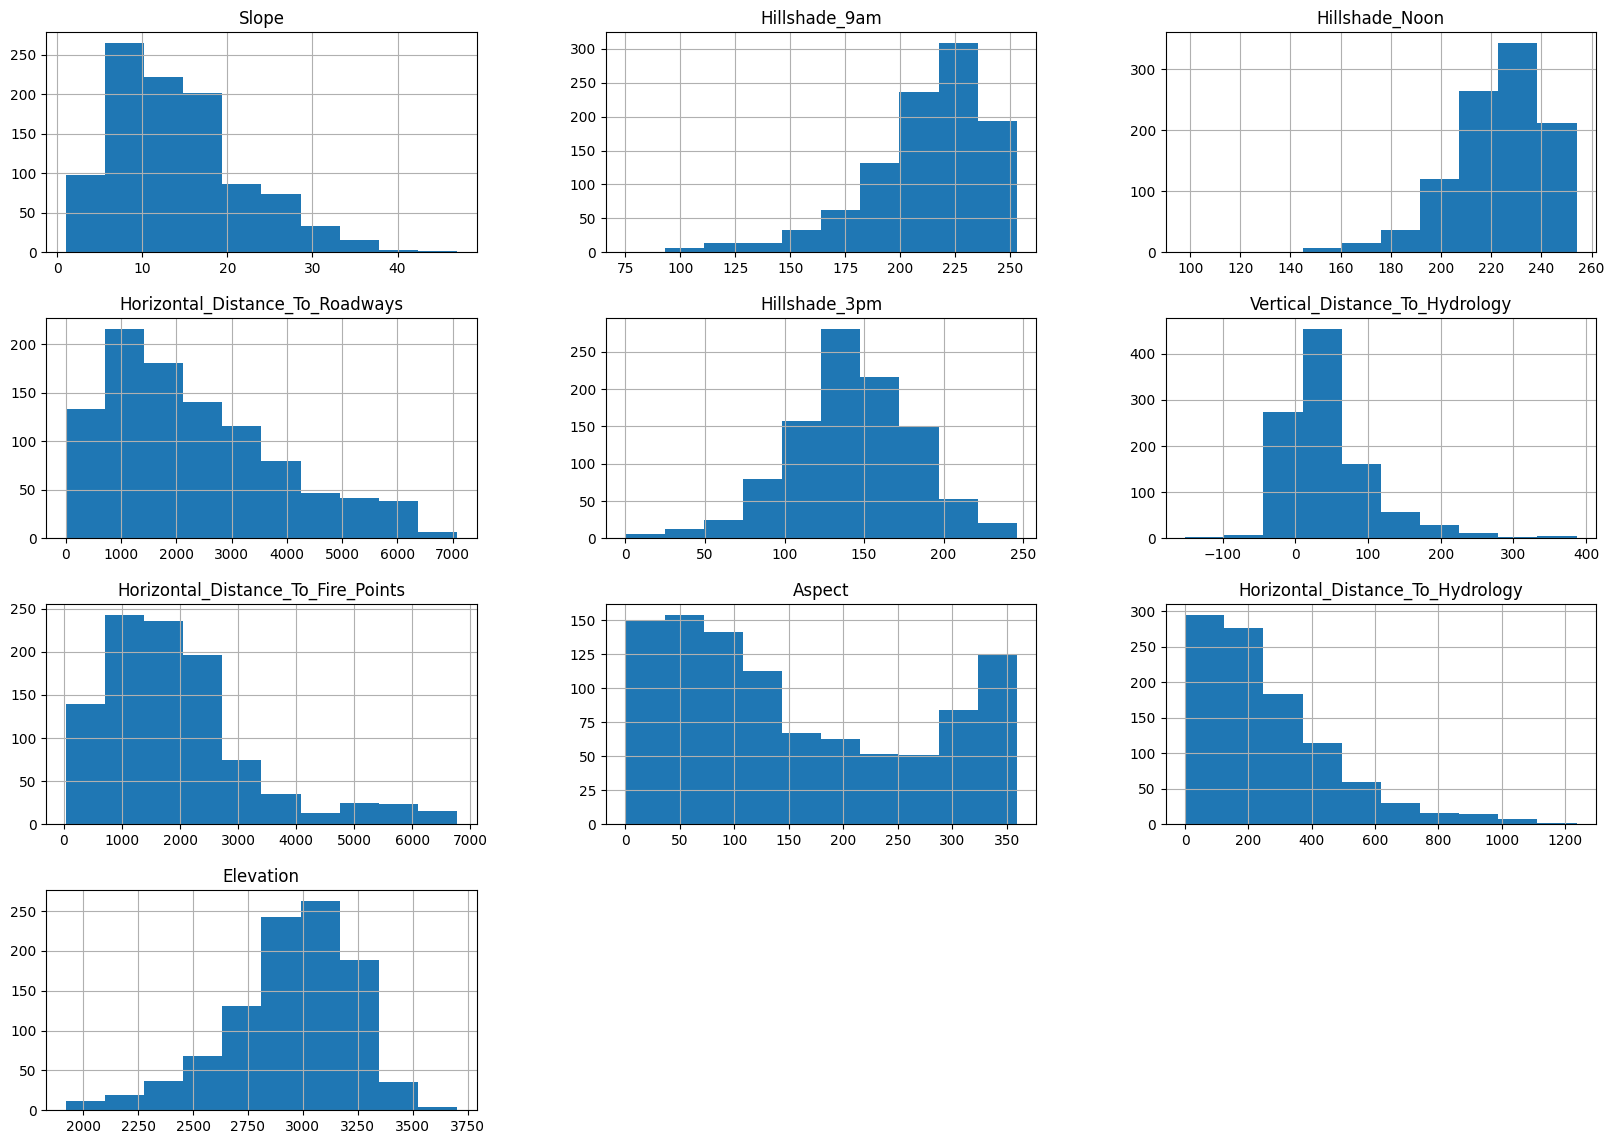

In [9]:
_ = X_sampled.hist(figsize=(20, 14))

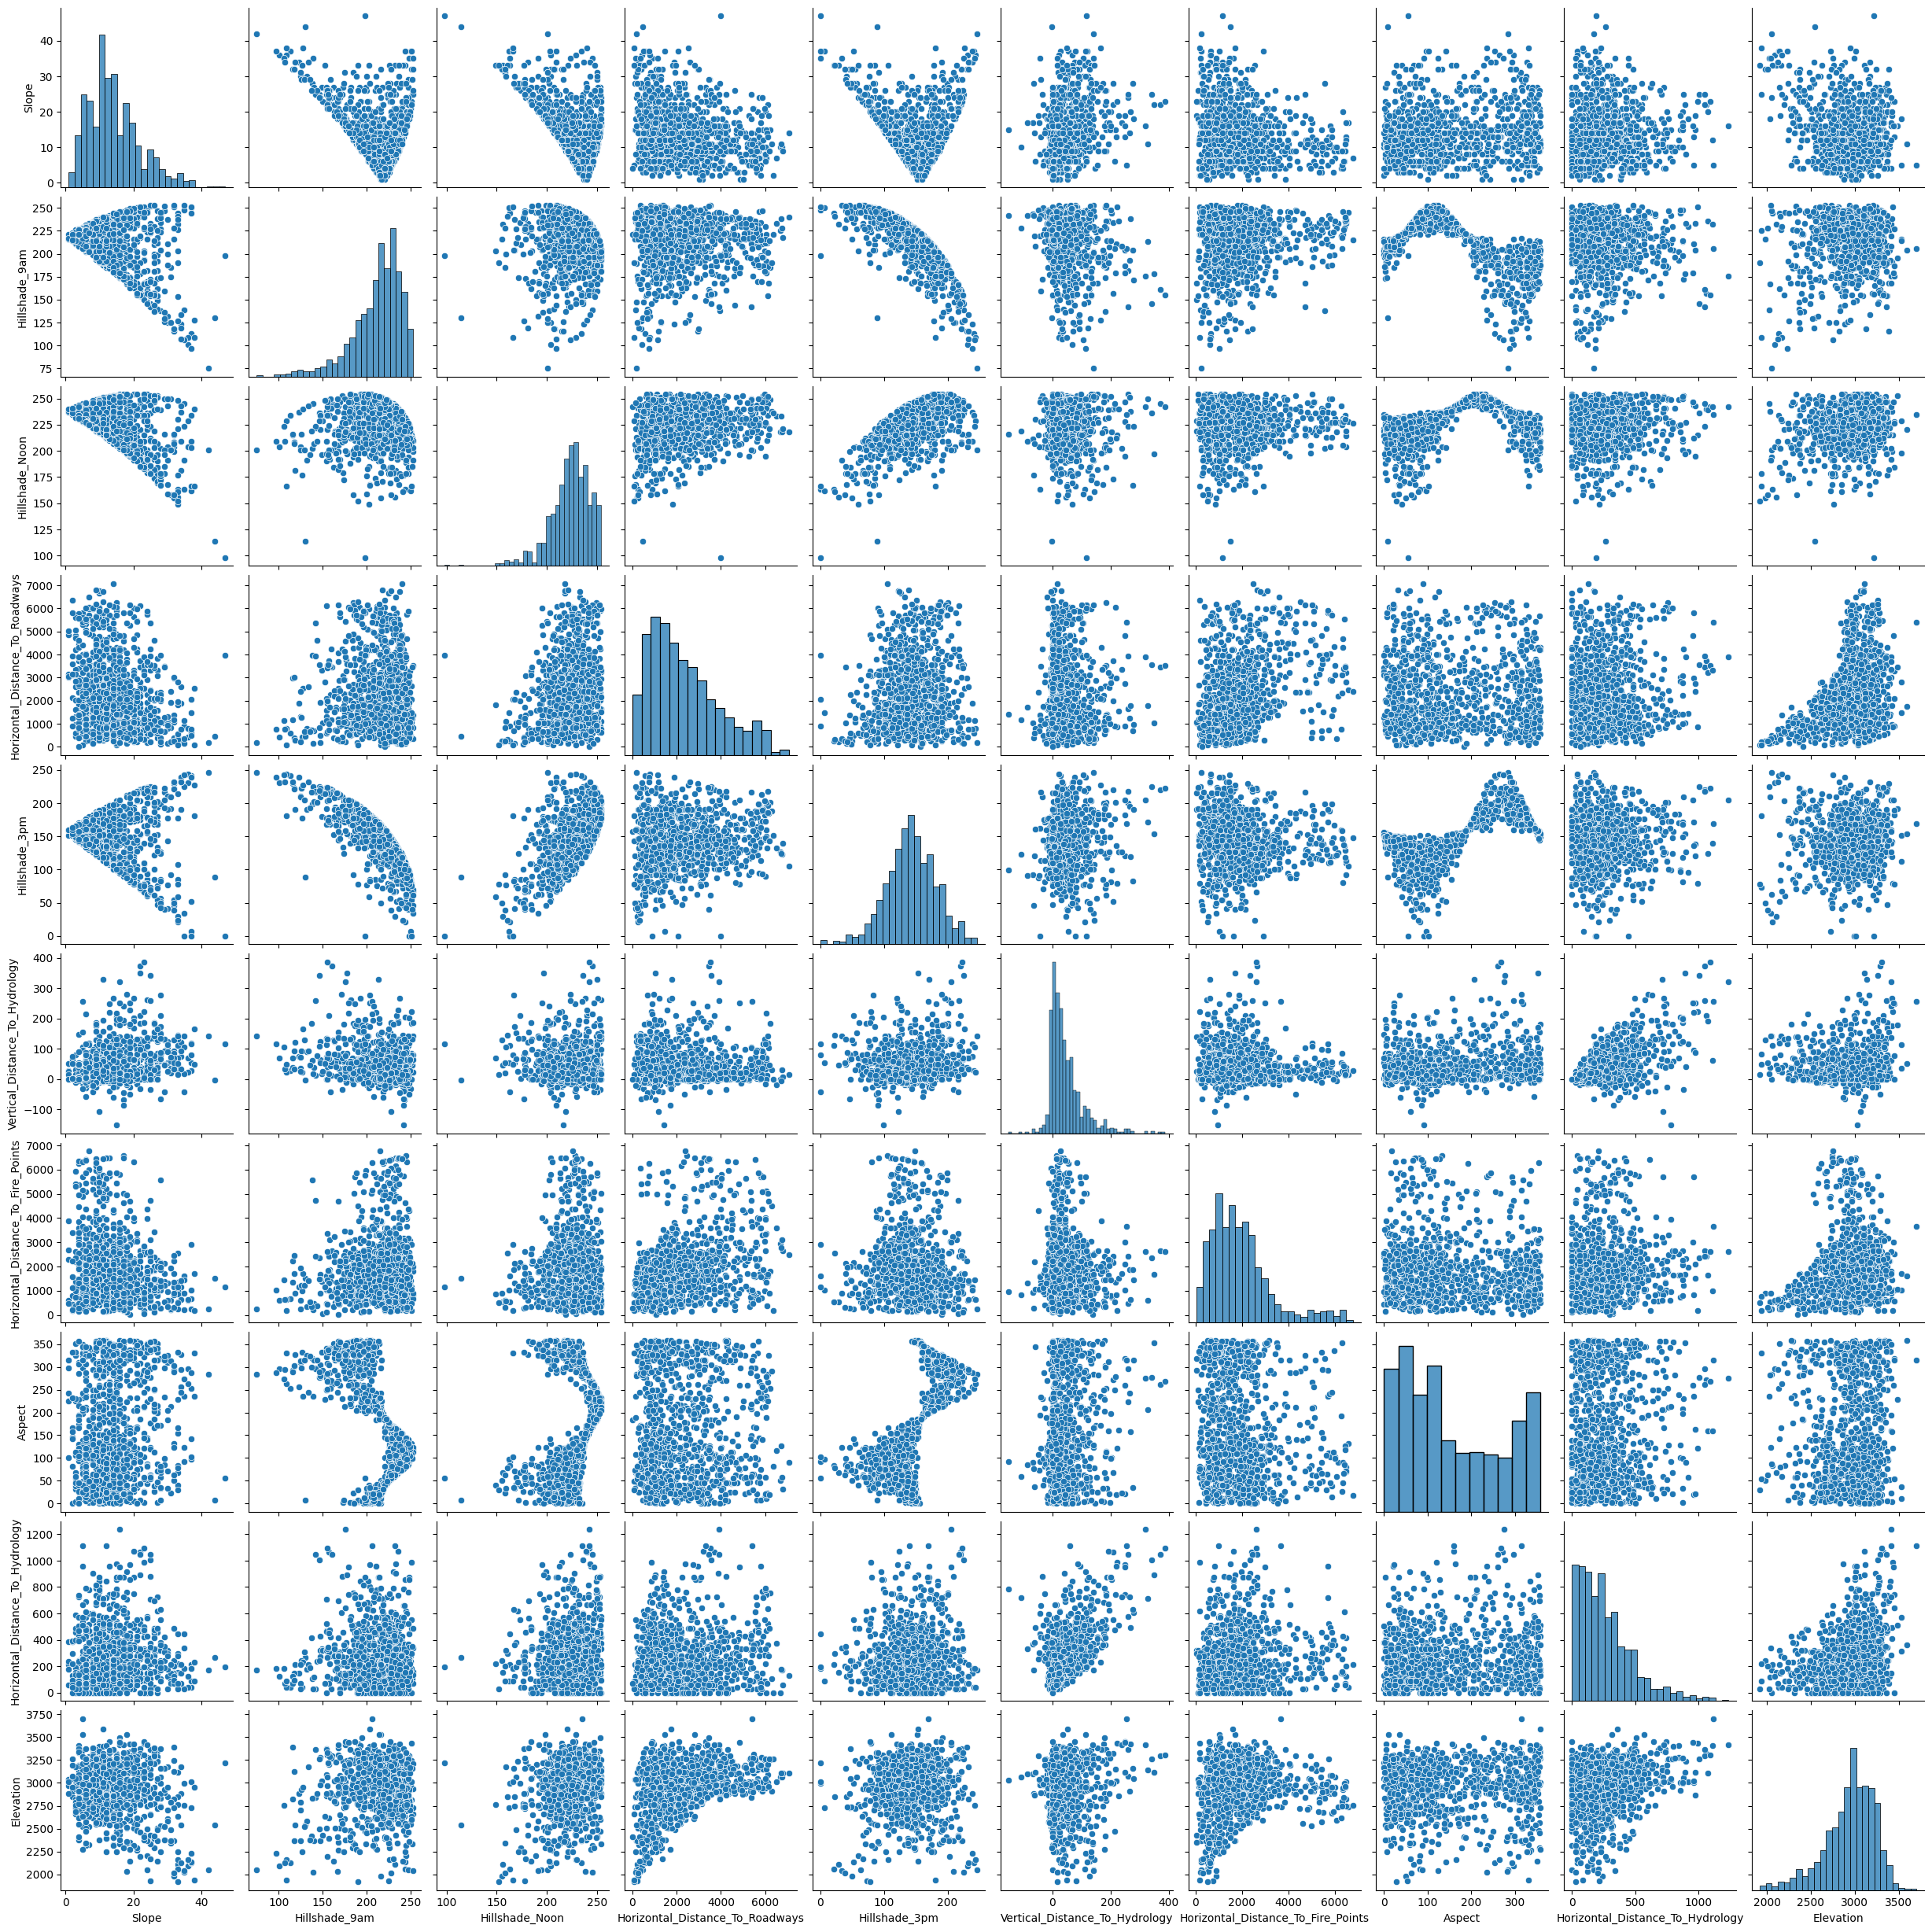

In [10]:
sns.pairplot(X_sampled)

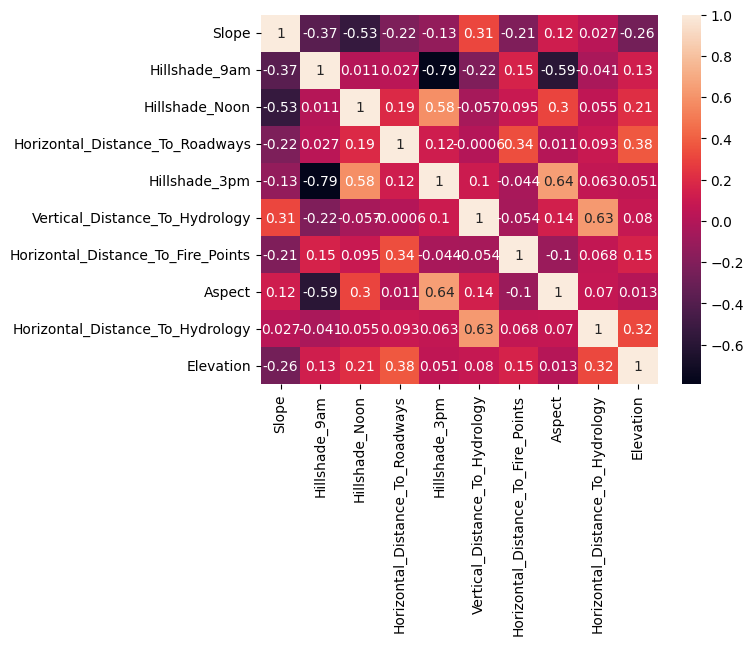

In [11]:
# Correlation matrix
import seaborn as sns
corr_matrix = X_sampled.corr()

# Heatmap of the correlation matrix

_= sns.heatmap(corr_matrix, annot=True)

## The graphic show that it seems don't exist a

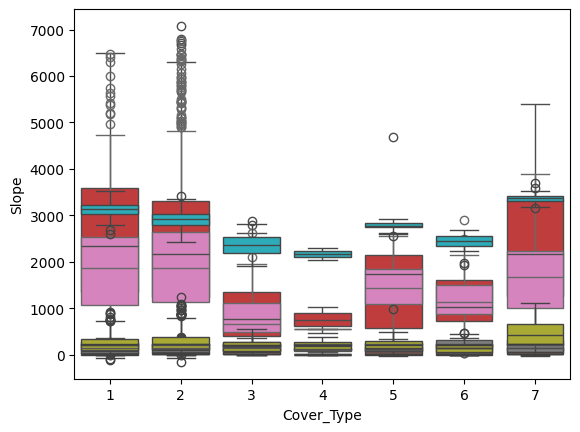

In [12]:
# box plot
for col in X_sampled.columns:
    sns.boxplot(x=Y_sampled, y=X_sampled[col])

## Boxplot is a good tool to visualise a effect of the numerical variable in the categorical target

In [13]:
with open('Dataset2.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
#print(result['encoding'])

Dataset2 = pd.read_csv('Dataset2.csv', delimiter=",",decimal = ".",encoding=result['encoding'])
Dataset2.head()


,Wilderness_Area,Soil_Type
0,1,29
1,1,29
2,1,12
3,1,30
4,1,29


In [14]:
print(Dataset2.dtypes)

Wilderness_Area    int64
Soil_Type          int64
dtype: object


In [15]:
Dataset2[['Wilderness_Area']].value_counts()

Wilderness_Area
1                  260796
3                  253364
4                   36968
2                   29884
Name: count, dtype: int64

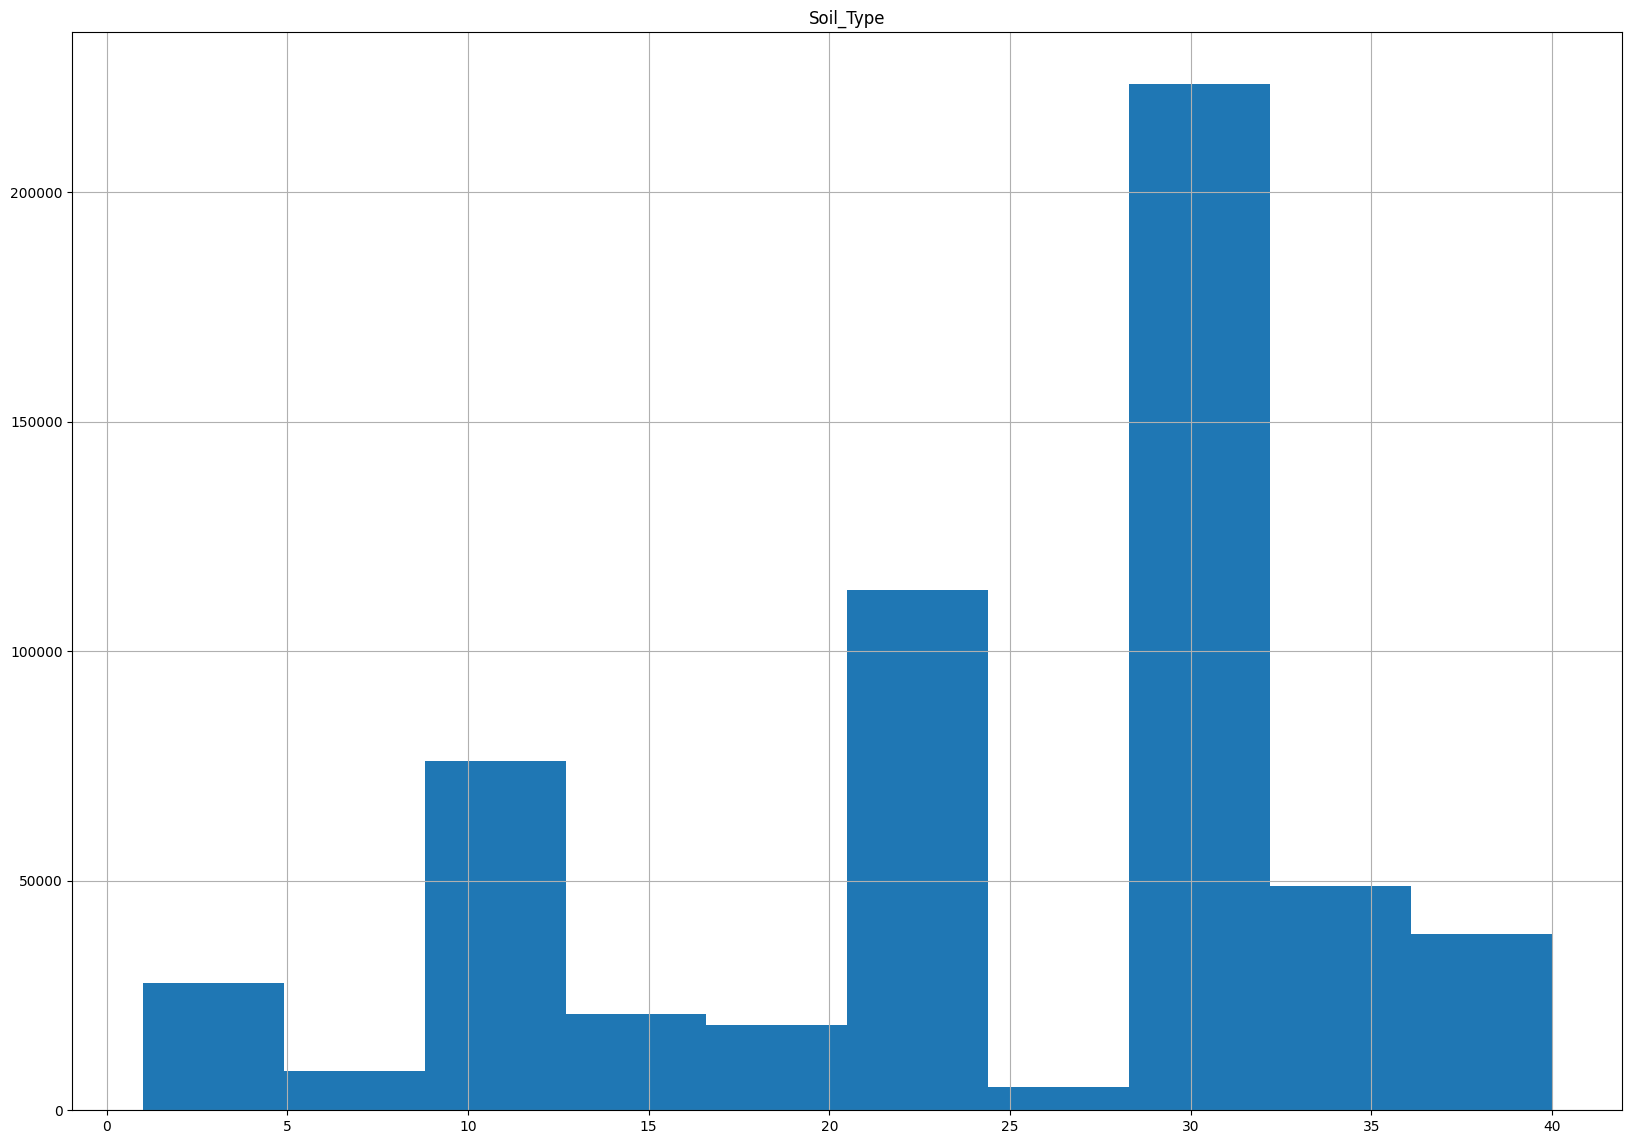

In [16]:
_=Dataset2[['Soil_Type']].hist(figsize=(20, 14))

## Wilderness_Area is categorical variables and Soil_Type is numerical variable.

In [17]:
# Concatenate the data

combined_X = pd.concat([X, Dataset2], axis=1)
combined_X.head()

,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Roadways,Hillshade_3pm,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Aspect,Horizontal_Distance_To_Hydrology,Elevation,Wilderness_Area,Soil_Type
0,3,221,232,510,148,0,6279,51,258,2596,1,29
1,2,220,235,390,151,-6,6225,56,212,2590,1,29
2,9,234,238,3180,135,65,6121,139,268,2804,1,12
3,18,238,238,3090,122,118,6211,155,242,2785,1,30
4,2,220,234,391,150,-1,6172,45,153,2595,1,29


In [18]:
from sklearn.model_selection import train_test_split # split  data into training and testing sets


X_train, X_test, Y_train, Y_test = train_test_split(combined_X, Y,test_size=0.2, random_state=12345)

X_train.shape
X_test.shape
print(X_train.shape,X_test.shape)

(464809, 12) (116203, 12)


# Before training the model we should standardised numerical features and threat missings values and perhaps encode categorical features

In [19]:
X_train.columns

Index(['Slope', 'Hillshade_9am', 'Hillshade_Noon',
       'Horizontal_Distance_To_Roadways', 'Hillshade_3pm',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points',
       'Aspect', 'Horizontal_Distance_To_Hydrology', 'Elevation',
       'Wilderness_Area', 'Soil_Type'],
      dtype='object')

In [20]:
categorical_cols = ['Wilderness_Area']
numerical_cols = ['Slope', 'Hillshade_9am', 'Hillshade_Noon',
       'Horizontal_Distance_To_Roadways', 'Hillshade_3pm',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points',
       'Aspect', 'Horizontal_Distance_To_Hydrology', 'Elevation', 'Soil_Type']


In [21]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or median
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [22]:
X_train.head(2)

,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Roadways,Hillshade_3pm,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Aspect,Horizontal_Distance_To_Hydrology,Elevation,Wilderness_Area,Soil_Type
84351,15,237,211,295,101,43,1008,76,240,2545,1,12
552815,16,231,244,1061,139,72,4146,167,450,3401,2,38


## Elastic net principle.


The elastic net penalty is a regularization technique used in machine learnings to prevent overfitting. It combines properties of both L1 (Lasso) and L2 (Ridge) regularizatio andbines both L1 and L2 regularization penalt
$$ies:
E_ast_c Net Pena\alpha ty _ α*L1 Penalty\alpha+ (1_α)*L2 P$$enalty

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf_l1l2_LR = LogisticRegressionCV(penalty='elasticnet', l1_ratios=[0.5], 
                                   cv=5, multi_class="multinomial", 
                                 solver="saga",tol=0.01, random_state=12345)

model = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', clf_l1l2_LR)])

model.fit(X_train,Y_train)
prediction = model.predict(X_test)
accuracy_LR = accuracy_score(Y_test, prediction)

print("Accuracy of Logistic Regression :","%.3f" % accuracy_LR)



Accuracy of Logistic Regression : 0.714


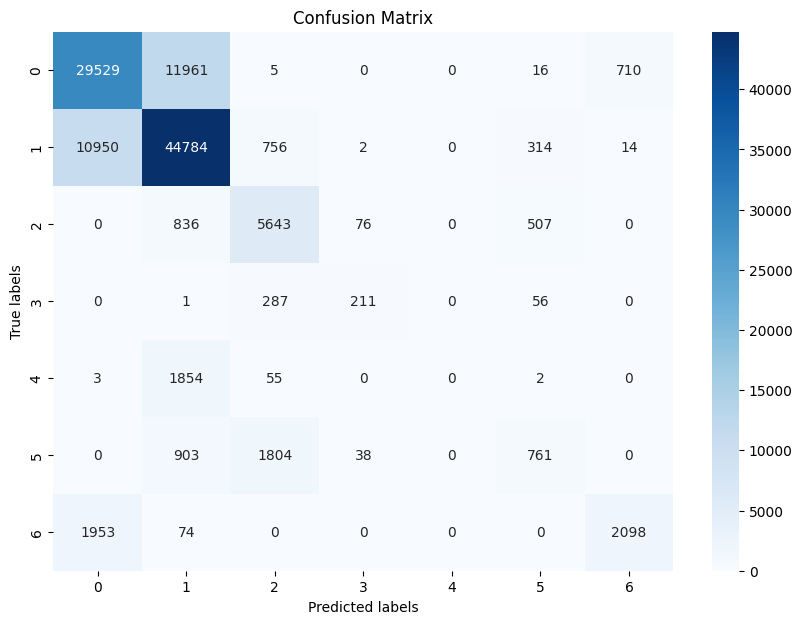

In [26]:
from sklearn.metrics import confusion_matrix
# Confusion matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, prediction)

# Display the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Diagonal Values: The numbers along the diagonal of the matrix represent correct predictions for each class. The model has correctly predicted:- Example :
    
Class 129 52953 time    s
Class 24 784492 tim    es
Class5643173 ti    mes
Clas2114: 95 

## Off-Diagonal Values: These numbers indicate the instances where the model has made incorrect predictions. For 

- example:
    1095041 instances of Class 1 were misclassified as Class 2    836401 instances of Class 1 were misclassified as Class     287
527 instances of Class 3 were misclassified as Class 2, and so on.times

Some classes like Class 0 and Class 1 have a high number of correct predictions(29529,44 784 ), suggesting the model performs well on these classes.
Other classes, such as Class 3 and Class 4, have very few correct predictions, which may indicate that the model struggles with these classes, or they are underrepresented in the training data.
There seems to be a considerable number of instances where Class 0 is misclassified as Class 1 and vice versa, indicating possible class confusion or similarity in feature patterns for these classes.
 
 while the model is quite accurate for certain classes:
mes), it performs poorly on ot()hers. This could be due to various factors, including class imbalance, lack of distinguishable features, or insufficient model complexity to capture the nuances between classes. 

## Part 3

OOB error is an internal validation measure for random forests, calculated by aggregating prediction performance on the data not used during training of each constituent tree. It serves as an estimate of generalization capability without external validation.

In [28]:
## Training Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


depths = [10, 20, 30]
oob_errors = []
models = []
best_oob_error = float('inf')
best_model = None
i = 0
for depth in depths:
    print(i)
    model = RandomForestClassifier(max_depth=depth, oob_score=True, random_state=42,
                                   n_estimators=100,  
                                   warm_start=True  # This allows us to add more estimators later if needed
                                  )
    model.fit(X_train, Y_train)
    oob_error = 1 - model.oob_score_
    oob_errors.append(oob_error)
    models.append(model)
    if oob_error < best_oob_error:
        best_oob_error = oob_error
        best_model = model
    i = i+1
    print("Done")

# Print OOB errors for each model
for depth, error in zip(depths, oob_errors):
    print(f"Depth: {depth}, OOB Error: {error}")



Depth: 10, OOB Error: 0.21510340806653916
Depth: 20, OOB Error: 0.057580640650245596
Depth: 30, OOB Error: 0.03892996908407542


Accuracy of the Best Random Forest: 0.963


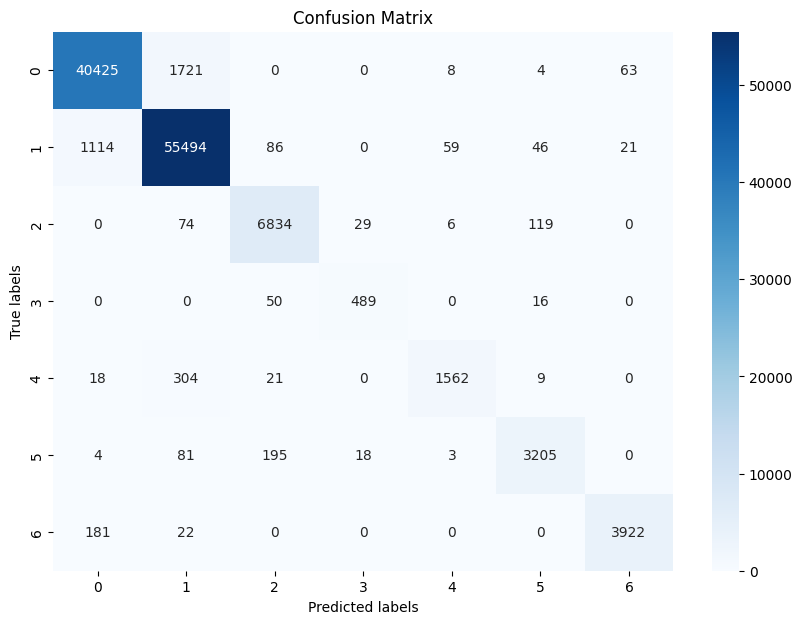

In [29]:
# Compute the accuracy of the best random forest model
predictions = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy of the Best Random Forest: {:.3f}".format(accuracy))

# Display the confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


## Diagonal Values: The numbers along the diagonal of the matrix represent correct predictions for each class. The model has correctly predicted:
- Example :
    Class 1: 40 425 times
    Class 2: 55494 times
    Class 3: 68343 times
    Class 4: 486 times

## Off-Diagonal Values: These numbers indicate the instances where the model has made incorrect predictions. For 

- example:

    9,641 instances of Class 1 were misclassified as Class 2.
    401 instances of Class 1 were misclassified as Class 4.
    527 instances of Class 3 were misclassified as Class 2, and so on.

# Compare to the last model the accuracy is more high(0.963 ) and the model do less bad prediction
# error as we see in the confusion matrix(as we see in the diagonal.

# Question 2

If we run the model it will crach because the xgboost package does not handle strings for labels unlike all the models trained previously, so you need to encode them first as integers (see sklearn.preprocessing LabelEncoder).

In [32]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier

# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y_train = label_encoder.transform(Y_train)

clf_xgb = XGBClassifier(objective='multi:softprob', seed='12345',
                       gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200)
clf_xgb.fit(X_train, label_encoded_y_train)

accuracy_xgb = accuracy_score(label_encoder.transform(Y_test), clf_xgb.predict(X_test))

print("Accuracy of XGBOOST :","%.3f" % accuracy_xgb)




Accuracy of XGBOOST : 0.784


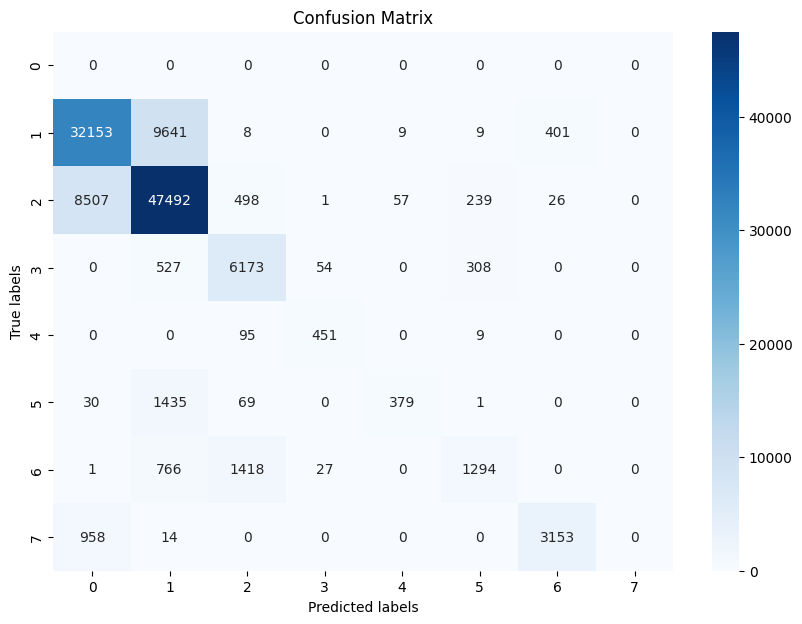

In [33]:
# Display the confusion matrix
predictions = clf_xgb.predict(X_test)
conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Diagonal Values: The numbers along the diagonal of the matrix represent correct predictions for each class. The model has correctly predicted:
- Example :
    Class 1: 32153 times
    Class 2: 47492 times
    Class 3: 6173 times
    Class 4: 95 times

## Off-Diagonal Values: These numbers indicate the instances where the model has made incorrect predictions. For 

- example:

    9641 instances of Class 1 were misclassified as Class 2.
    401 instances of Class 1 were misclassified as Class 4.
    527 instances of Class 3 were misclassified as Class 2, and so on.
  
## This model is very good but do more error that a random forest but more accurate that logistic regression even do it is not accurate.

In [34]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def compute_roc_auc(models, X, Y_test):
    """
    Compute ROC AUC for a list of models.
    
    Args:
    models (dict): A dictionary of models with their names as keys.
    X_test (array-like): Test features.
    Y_test (array-like): True labels for the test set.
    
    Returns:
    dict: A dictionary containing FPR, TPR, and ROC AUC for each model.
    """
    Y_classes = np.unique(Y_test)
    Y_test_binarized = label_binarize(Y_test, classes=Y_classes)
    n_classes = len(Y_classes)
    
    results = {}

    for model_name, model in models.items():
        if model_name == 'Logistic':
            model = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', clf_l1l2_LR)])
            model.fit(X_train,Y_train)
            score = model.predict_proba(X_test)
        else:
          
            score = model.predict_proba(X_test)
        
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # Compute ROC for each class
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        results[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'score':score}

    return results

models = {
    'Logistic': clf_l1l2_LR,
      # Assurez-vous que clf_svm est entraîné sur des données mises à l'échelle si nécessaire
    'Random Forests': best_model,
    'XGBOOST': clf_xgb,
    
}

roc_results = compute_roc_auc(models, X_test, Y_test)



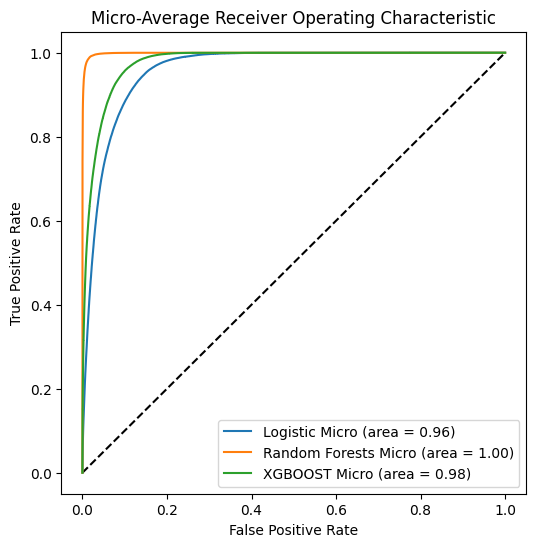

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Ligne diagonale

for model_name, metrics in roc_results.items():
    plt.plot(metrics['fpr']['micro'], metrics['tpr']['micro'], label=f'{model_name} Micro (area = {metrics["roc_auc"]["micro"]:.2f})')

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Micro-Average Receiver Operating Characteristic')
plt.show()


# As we can see in this graph the model which has the best abilities of prediction 
# is random Forest , follow by XGboost micro(behaps because we have not chosen the best hyperpameter for Xgboost)


In [37]:
from sklearn.metrics import roc_auc_score

# Affichage des AUC micro-averaged
print("Area under Roc Curve (micro-average) for:\n")
for model_name in models.keys():
    print(f"- {model_name}: {roc_results[model_name]['roc_auc']['micro']:.3f}")

# Calcul et affichage des AUC one-vs-one macro-averaged
print("\nArea under Roc Curve (one-vs-one macro-average) for:\n")
for model_name, model in models.items():
    
    score = roc_results[model_name]['score']
    auc_ovo_macro = roc_auc_score(Y_test, score, multi_class="ovo", average="macro")
    print(f"- {model_name}: {auc_ovo_macro:.3f}")

Area under Roc Curve (micro-average) for:

- Logistic: 0.958
- Random Forests: 0.999
- XGBOOST: 0.977

Area under Roc Curve (one-vs-one macro-average) for:

- Logistic: 0.918
- Random Forests: 0.998
- XGBOOST: 0.967
